In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
url = r"C:\Users\MSI\Desktop\DS\ayedi\fromage.xlsx"
data = pd.read_excel(url)
data


,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
5,Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
6,Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
7,Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
8,Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28
9,Comte,399,92.0,220.5,32.4,55.9,1.3,29.2,120,51


In [3]:
print(data.head()) 

     Fromages   calories  sodium  calcium  lipides  retinol  folates  \
0  CarredelEst       314   353.5     72.6     26.3     51.6     30.3   
1      Babybel       314   238.0    209.8     25.1     63.7      6.4   
2     Beaufort       401   112.0    259.4     33.3     54.9      1.2   
3         Bleu       342   336.0    211.1     28.9     37.1     27.5   
4    Camembert       264   314.0    215.9     19.5    103.0     36.4   

   proteines  cholesterol  magnesium  
0       21.0           70         20  
1       22.6           70         27  
2       26.6          120         41  
3       20.2           90         27  
4       23.4           60         20  


In [4]:
print(data.describe()) 

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

In [5]:
data.isnull().sum()
print(data)

             Fromages   calories  sodium  calcium  lipides  retinol  folates  \
0          CarredelEst       314   353.5     72.6     26.3     51.6     30.3   
1              Babybel       314   238.0    209.8     25.1     63.7      6.4   
2             Beaufort       401   112.0    259.4     33.3     54.9      1.2   
3                 Bleu       342   336.0    211.1     28.9     37.1     27.5   
4            Camembert       264   314.0    215.9     19.5    103.0     36.4   
5               Cantal       367   256.0    264.0     28.8     48.8      5.7   
6            Chabichou       344   192.0     87.2     27.9     90.1     36.3   
7             Chaource       292   276.0    132.9     25.4    116.4     32.5   
8              Cheddar       406   172.0    182.3     32.5     76.4      4.9   
9                Comte       399    92.0    220.5     32.4     55.9      1.3   
10         Coulomniers       308   222.0     79.2     25.6     63.6     21.1   
11                Edam       327   148.0

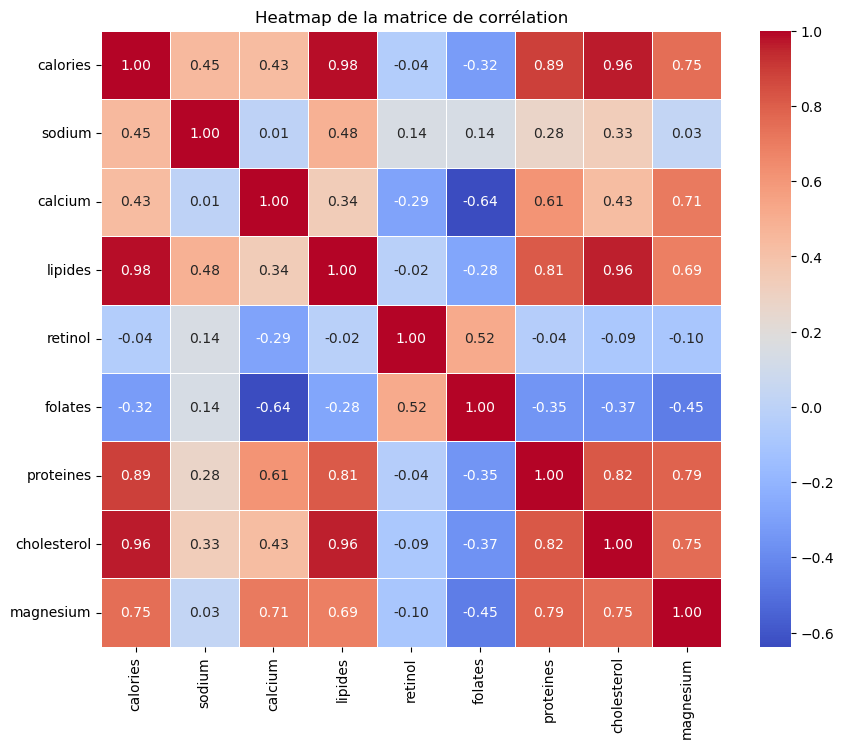

In [6]:
import seaborn as sns, matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_data.corr() 

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de la matrice de corrélation')
plt.show()


In [7]:
# Sélection des caractéristiques pour la classification
# Il s'agit de sélectionner les colonnes à utiliser comme caractéristiques dans le processus de classification.
# Dans ce cas, toutes les colonnes sauf la première sont sélectionnées, la première colonne étant probablement le nom du fromage.
features = data.iloc[:, 1:]

# Standardisation des données
# La standardisation des données est une étape importante dans de nombreux algorithmes d'apprentissage automatique,
# car elle garantit que les caractéristiques ont la même échelle, ce qui peut améliorer les performances du modèle.
scaler = StandardScaler()
# La méthode fit_transform calcule la moyenne et l'écart-type de chaque colonne (caractéristique) et effectue une transformation
# pour mettre à l'échelle les données afin qu'elles aient une moyenne de 0 et un écart-type de 1.
features_scaled = scaler.fit_transform(features)


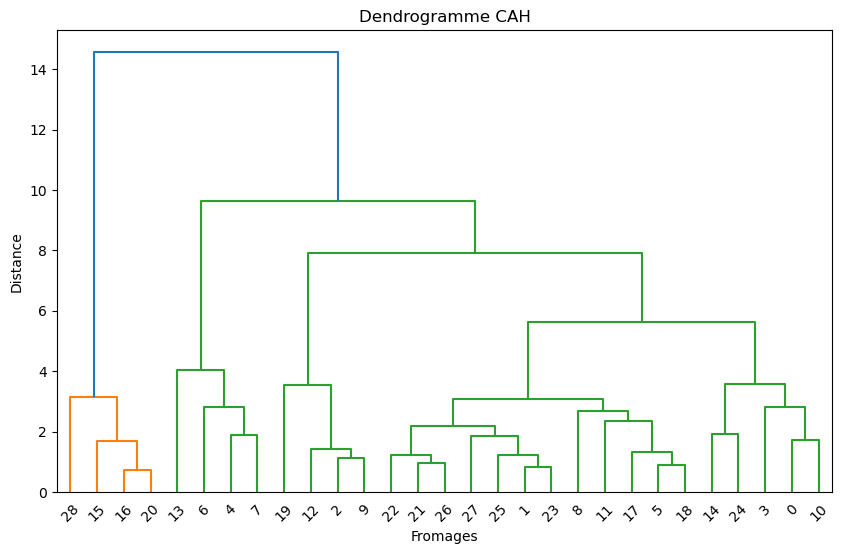

In [8]:
# Classification ascendante hiérarchique (CAH)
linkage_matrix = linkage(features_scaled, method='ward', metric='euclidean')

# Affichage du dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogramme CAH')
plt.xlabel('Fromages')
plt.ylabel('Distance')
plt.show()


C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


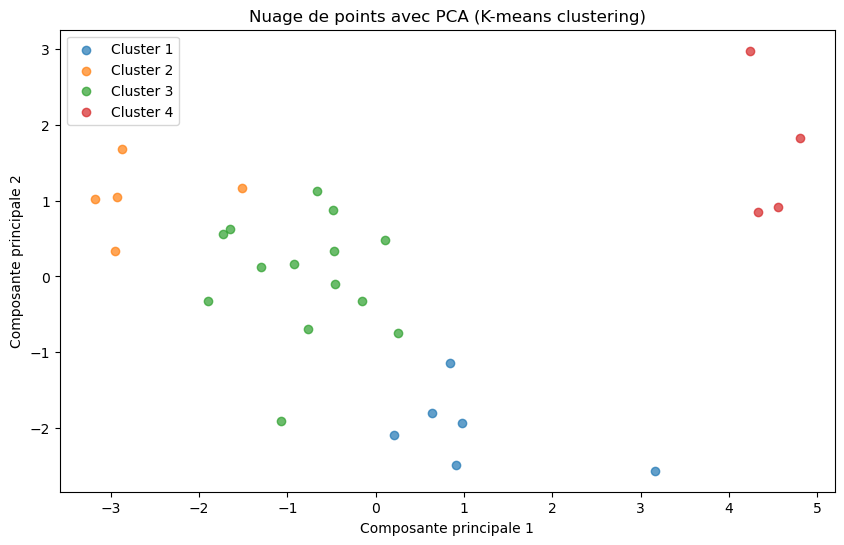

In [9]:
from sklearn.decomposition import PCA
# Importer la classe PCA (Analyse en Composantes Principales) depuis scikit-learn

# Appliquer PCA (Analyse en Composantes Principales)
pca = PCA(n_components=2)  # Définir le nombre de composantes principales à 2
features_pca = pca.fit_transform(features_scaled)
# La méthode fit_transform calcule les composantes principales à partir des données standardisées.

# Classification avec K-means
kmeans = KMeans(n_clusters=4, random_state=42)  # Choisir le nombre de clusters
kmeans.fit(features_scaled)
cluster_labels = kmeans.labels_
# Utilisation de l'algorithme K-means pour regrouper les données standardisées en 4 clusters.
# Les étiquettes des clusters sont stockées dans cluster_labels.

# Affichage du nuage de points avec PCA et coloration par classe
plt.figure(figsize=(10, 6))
for i in range(len(set(cluster_labels))):  # Parcourir chaque classe unique
    plt.scatter(features_pca[cluster_labels == i, 0],  # Sélectionner les données appartenant à la classe i
                features_pca[cluster_labels == i, 1],
                label=f'Cluster {i + 1}',  # Étiquette de la légende
                alpha=0.7)  # Opacité des points
plt.title('Nuage de points avec PCA (K-means clustering)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend()
plt.show()
# Tracer un nuage de points en utilisant les deux premières composantes principales (axes) obtenues par PCA.
# Chaque point est coloré en fonction de son cluster assigné par l'algorithme K-means.
# Les légendes indiquent les clusters correspondants.


C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less ch

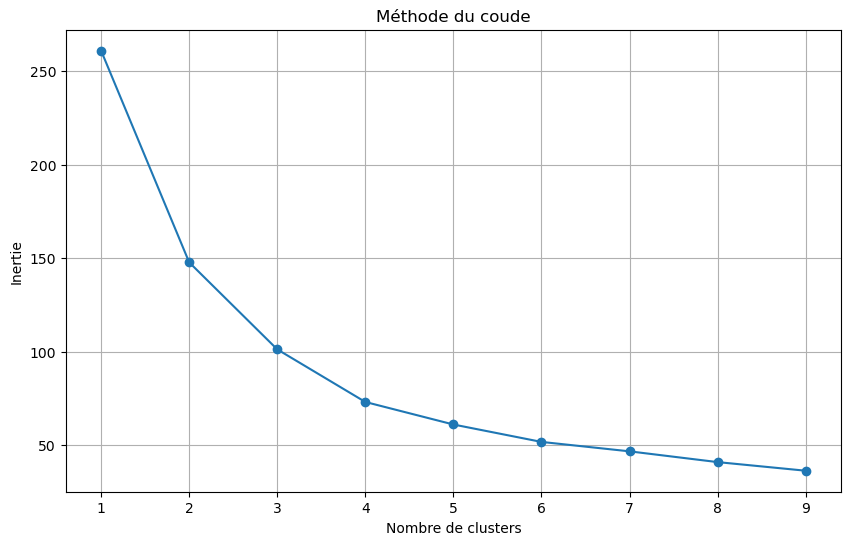

In [ ]:
from sklearn.decomposition import PCA
# Importer la classe PCA (Analyse en Composantes Principales) depuis scikit-learn

# Méthode du coude pour trouver le nombre optimal de clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
# La méthode du coude est une technique pour déterminer le nombre optimal de clusters dans un algorithme de clustering.
# Elle consiste à calculer l'inertie (somme des carrés des distances des échantillons au centre de leur cluster le plus proche)
# pour différentes valeurs de k (nombre de clusters). Ici, nous itérons sur différentes valeurs de k de 1 à 9.

# Tracer le graphique de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o', linestyle='-')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()
# Tracer un graphique montrant le changement de l'inertie en fonction du nombre de clusters.
# Le coude dans le graphique représente le nombre optimal de clusters, où l'inertie commence à diminuer de manière marginale.

# Choisir le nombre optimal de clusters à partir du graphique de la méthode du coude
optimal_k = int(input("Entrez le nombre optimal de clusters à partir du graphique de la méthode du coude : "))

# Classification avec K-means en utilisant le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features_scaled)
data['cluster_kmeans'] = kmeans.labels_
# Utiliser l'algorithme K-means avec le nombre optimal de clusters pour regrouper les données.
# Les étiquettes des clusters sont ajoutées à la colonne 'cluster_kmeans' du DataFrame.

# Affichage des centres des clusters
print("Centres des clusters (K-means):")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns))
# Afficher les centres de chaque cluster en inversant la standardisation des centres des clusters,
# puis afficher ces centres avec les noms des caractéristiques originales.

